In [20]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

import tiling_disk_plots as tdp
import tiling_disk_utils as tdu

#* sometimes needed for creating bins for histograms 
from astropy.stats import knuth_bin_width

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")


In [21]:
table_map = tdu.read_single_measurement('Tisch', '20220203_table_after_damage_full.txt')
#table_map = table_map.query('-158 < z')
#table_map = table_map.query('-156 > z')

table_map['z'] = tdu.subtract_mean(table_map['z'])
table_map['z'] = tdu.convert_mm_to_microns(table_map['z'] )

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

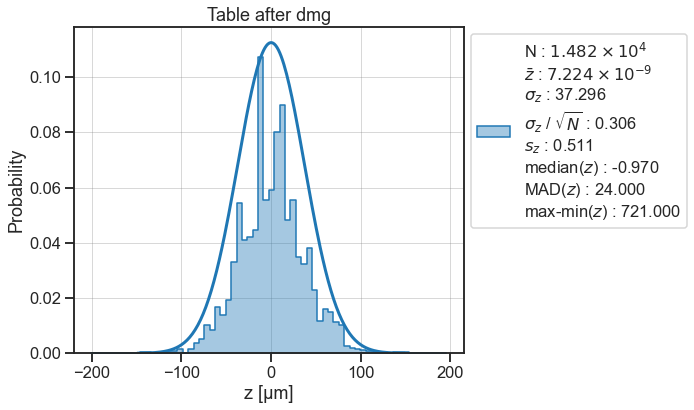

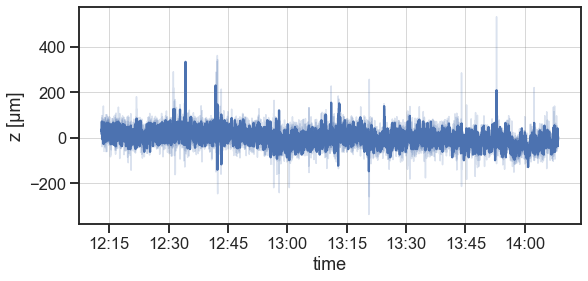

In [22]:
table_map_ts = tdu.df_convert_unix_to_datetime(table_map)
nbins = np.array(range(-200,200, 6)) - 0.5
tdp.ts_hist(table_map_ts, bins=nbins)
ax = plt.gca()
ax.set_title('Table after dmg')
tdp.plot_data_vs_time(table_map_ts)

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='x [mm]', ylabel='y [mm]'>)

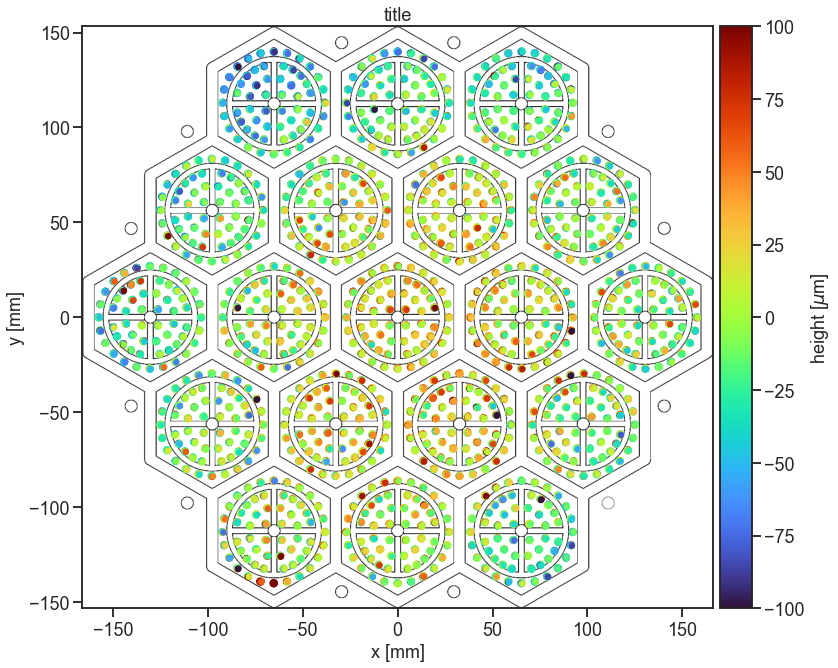

In [23]:
tdp.full_hexagon_plot(table_map, mode='z', size=5**2, cbar_norm=(-100,0,100), cmap='turbo')

In [24]:
table_map = tdu.read_single_measurement('Tisch', '20220203_table_after_damage_full.txt')
#table_map = table_map.query('-158 < z')
#table_map = table_map.query('-156 > z')

table_map['z'] = tdu.subtract_mean(table_map['z'])
table_map['z'] = tdu.convert_mm_to_microns(table_map['z'] )
table_map = tdu.add_ring_nr_label(table_map)

In [25]:
table_map_pt = tdu.point_table(table_map)

In [26]:
table_map_pt['z_mean'].describe(percentiles=[.05,.25,.5,.75,.95])

count    1140.000000
mean        0.004875
std        21.086272
min       -71.277864
5%        -37.358633
25%       -12.893248
50%         1.568290
75%        14.722136
95%        29.810598
max       129.799059
Name: z_mean, dtype: float64

In [27]:
# def filter(z):
#     if -200 < z < 200: 
#         return z 
#     else: return np.nan

In [28]:
# table_map_pt['z','mean'] = table_map_pt['z','mean'].apply(lambda z: filter(z))

In [29]:
# table_map_pt['z','mean'].describe()

Text(0.5, 1.0, 'Table after 3.2.2022')

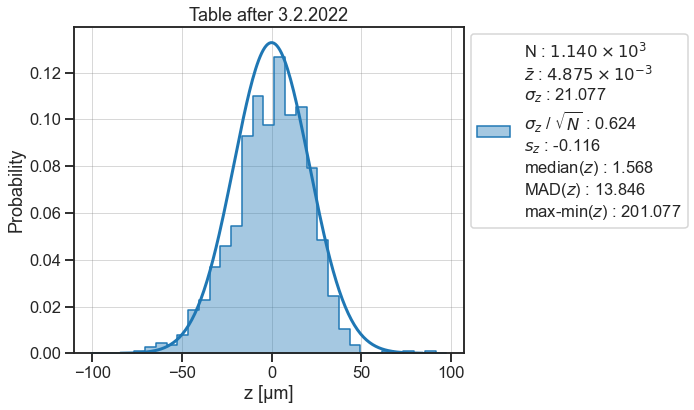

In [39]:
nbins = np.array(range(-100,100, 6)) - 0.5
tdp.ts_hist(table_map_pt, mode='z_mean', bins=nbins)
ax = plt.gca()
ax.set_title('Table after 3.2.2022')

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Table after 3.2.2022'}, xlabel='x [mm]', ylabel='y [mm]'>)

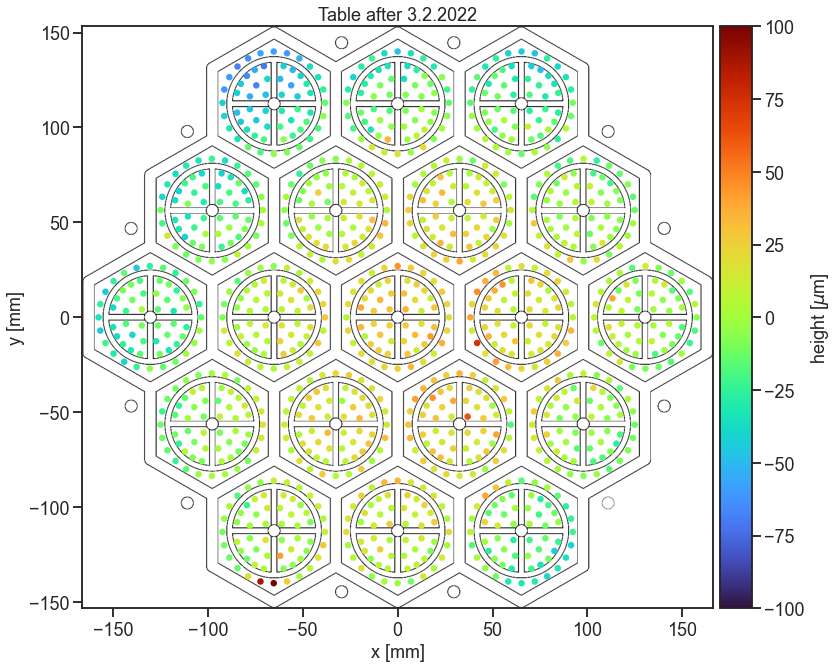

In [38]:
tdp.full_hexagon_plot(table_map_pt, mode=('z_mean'), size=5**2, cbar_norm=(-100, 0.004875 ,100), cmap='turbo', title='Table after 3.2.2022')

In [32]:
table_map_pt.query("hex_nr==18").describe(percentiles=[.05,.25,.5,.75,.95])

,hex_nr,point,unix_time,x,y,z_mean,z_measurement_error
count,60.0,60.000000,6.000000e+01,60.00000,60.00000,60.000000,60.000000
mean,18.0,30.500000,1.643893e+09,-65.25000,113.02000,-37.936838,7.321880
std,0.0,17.464249,1.078794e+02,15.31217,15.31217,17.365870,2.206769
min,18.0,1.000000,1.643893e+09,-92.25000,86.02000,-71.277864,3.835982
5%,18.0,3.950000,1.643893e+09,-88.76500,89.50500,-65.158633,4.576484
25%,18.0,15.750000,1.643893e+09,-78.04500,100.22500,-50.739402,6.006740
50%,18.0,30.500000,1.643893e+09,-65.25000,113.02000,-39.508633,6.966536
75%,18.0,45.250000,1.643893e+09,-52.45500,125.81500,-23.412479,8.169199
95%,18.0,57.050000,1.643893e+09,-41.73500,136.53500,-9.139402,10.311255
max,18.0,60.000000,1.643893e+09,-38.25000,140.02000,-4.662479,18.816609


In [33]:
table_map_hex = tdu.hex_table(table_map)

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Table after dmg'}, xlabel='x [mm]', ylabel='y [mm]'>)

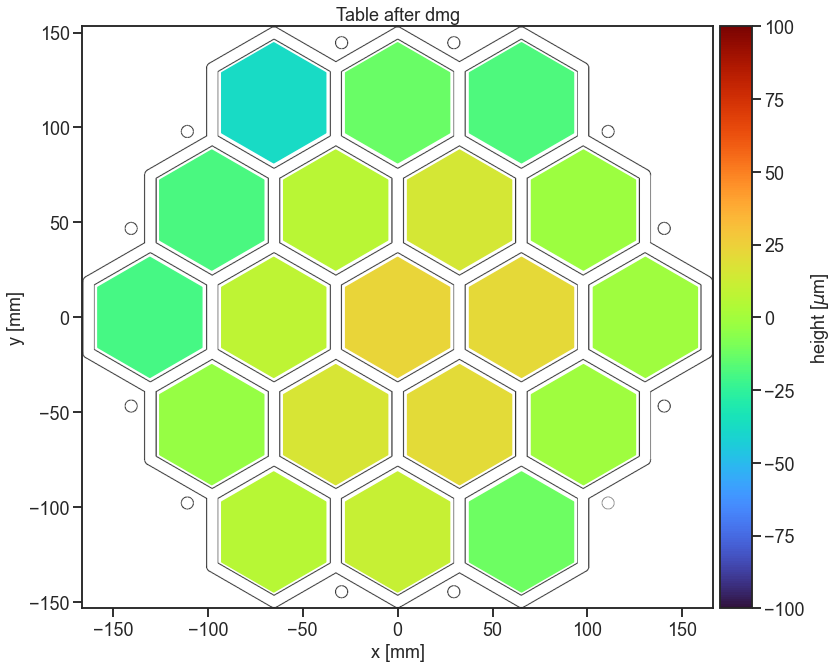

In [34]:
tdp.full_hexagon_plot(table_map_hex, mode=('z_mean'), size=120**2, cbar_norm=(-100, 0.004875, 100), cmap='turbo', marker='h', title='Table after dmg')

In [35]:
table_map_hex

,x,y,z_mean,z_measurement_error
hex_nr,,,,
1,-0.01,-0.01,23.394867,8.389741
2,-65.25,0.00,8.067008,8.413848
3,-32.63,-56.51,15.996495,8.179475
4,32.63,-56.51,20.932393,10.831432
5,65.25,0.00,21.609316,11.884427
6,32.63,56.51,15.505470,8.440475
7,-32.63,56.51,6.341367,8.520788
8,-130.50,0.00,-20.061197,10.055350
9,-97.88,-56.51,-3.749659,8.595545


In [36]:
table_map_hex['z_mean'].describe()

count    19.000000
mean      0.003157
std      16.830861
min     -37.936838
25%     -12.600941
50%      -0.848377
75%      13.144572
max      23.394867
Name: z_mean, dtype: float64

In [37]:
# tdp.ts_hist(table_map_pt)
# tdp.time_series_measurement(table_map_pt)